In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
import glob

# Read all matching CSV files
file_paths = glob.glob('../data/clean/*.csv')
file = '../../data/clean/beer_profile_and_ratings.csv'

df = pd.read_csv(file, on_bad_lines='warn')

#print(df['max ibu'].head())

## Contents
The main data set (beer_profile_and_ratings.csv) contains the following columns:\

1 - Name: Beer name (label)\
2 - Style: Beer Style\
3 - Brewery: Brewery name\
4 - Beer Name (Full): Complete beer name (Brewery + Brew Name) -- unique identifier for each beer\
5 - Description: Notes on the beer if available\
6 - ABV: Alcohol content of beer (% by volume)\
7 - Min IBU: The minimum IBU value each beer can possess. IBU was not a value available for each beer, but the IBU range for each style was\
8 - Max IBU: The maximum IBU value each beer can possess. IBU was not a value available for each beer, but the IBU range for each style was

The next eleven columns represent the tasting profile features of the beer, and are defined by word counts found in up to 25 reviews of each beer. The assumption is that people writing reviews are more than likely describing what they do experience rather than what they do not. (Refer to the file Beer Descriptors Simplified to see the list of words that are used to calculate the values contained in each of the feature columns below)

### (Mouthfeel)
9 - Astringency\
10 - Body\
11 - Alcohol

### (Taste)
12 - Bitter\
13 - Sweet\
14 - Sour\
15 - Salty\

### (Flavor And Aroma)
16 - Fruits\
17 - Hoppy\
18 - Spices\
19 - Malty

The last six columns contain information from beer reviews--they include the number (count) of consumer/user reviews, the average overall rating score, and the average rating scores for the aroma, appearance, palate, and taste of each individual beer.

20 - review _ aroma\
21 - review _ appearance\
22 - review _ palate\
23 - review _ taste\
24 - review _ overall\
25 - number _ of _ reviews

The next two files (Brewery Name Fuzzy Match List.csv and Beer Name Fuzzy Match List.csv) only contain lists of breweries and beers that are found in both source datasets--and consequently, included in this dataset. To see the data integration process in more details, check out this notebook.

The last file (Beer Descriptors Simplified) contains list of words that are used to calculate the values contained in the tasting profile feature columns.

Acknowledgements
Source: BeerAdvocate\
Credits:

Beer Tasting Profiles Dataset by sp1222.\
1.5 Million Beer Reviews by Tanya Cashorali (uploaded by Datadoume).
Context

In [4]:
print(df['max ibu'].describe())
print("")
print(df['bitter'].describe())

count    3197.000000
mean       38.986863
std        21.355281
min         0.000000
25%        25.000000
50%        35.000000
75%        45.000000
max       100.000000
Name: max ibu, dtype: float64

count    3197.000000
mean       36.364404
std        25.791152
min         0.000000
25%        17.000000
50%        31.000000
75%        52.000000
max       150.000000
Name: bitter, dtype: float64


In [5]:
from sklearn.cluster import KMeans


# Ensure the column is numeric and reshape it for sklearn
X = df['max ibu'].dropna().values.reshape(-1, 1)

# Create and fit KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df.loc[df['max ibu'].notna(), 'max ibu_cluster'] = kmeans.fit_predict(X)


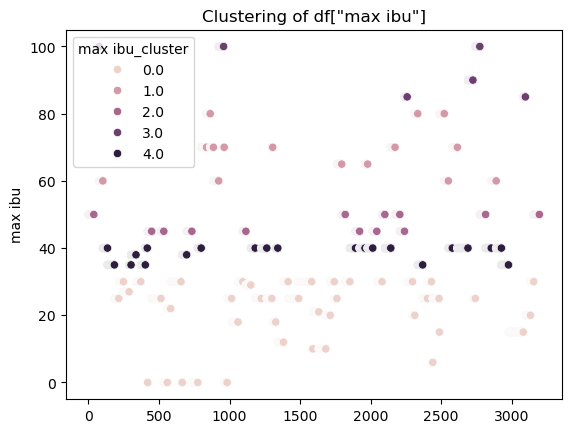

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=range(len(df)), y='max ibu', hue='max ibu_cluster', data=df)
plt.title('Clustering of df["max ibu"]')
plt.show()


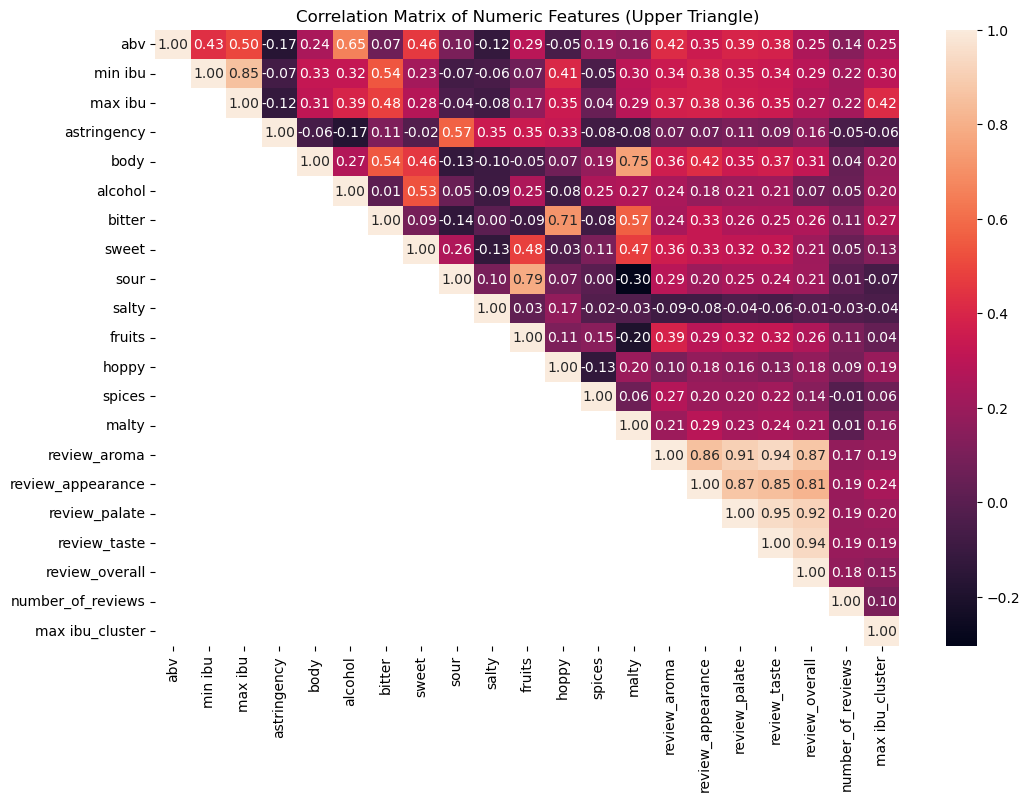

In [8]:
mask = np.tril(np.ones_like(corr_matrix, dtype=bool), k=-1)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numeric Features (Upper Triangle)')
plt.show()